In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [4]:
train_dir = 'C:\\Users\\Jaya\\Desktop\\Prodigy\\train' 
test_dir = 'C:\\Users\\Jaya\\Desktop\\Prodigy\\test1'  
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (50,50))
            img=img/255.0
            img=img.flatten()
            images.append(img)
            labels.append(label)
    return images, labels


In [5]:
# Load the dataset
cat_images, cat_labels = load_images_from_folder(os.path.join(train_dir, 'cat'), 0)
dog_images, dog_labels = load_images_from_folder(os.path.join(train_dir, 'dog'), 1)

# Combine the datasets
images = np.array(cat_images + dog_images)
labels = np.array(cat_labels + dog_labels)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size=0.2, random_state=42)

In [11]:
n_components = 0.8
svm = SVC()
pca = PCA(n_components=n_components, random_state=42)

In [12]:
pipeline = Pipeline([
    ('pca', pca),
    ('svm', svm)
])

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.8, random_state=42)),
                ('svm', SVC())])

In [14]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [15]:
print(accuracy)

0.6746


In [18]:
target_names = ['Cat', 'Dog']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

         Cat       0.68      0.67      0.67      2515
         Dog       0.67      0.68      0.67      2485

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



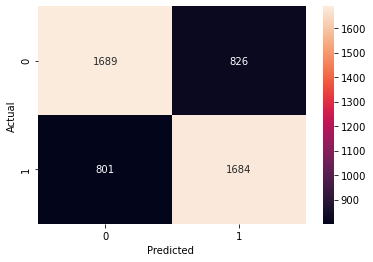

In [24]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted ')
plt.ylabel('Actual')
plt.show()

In [29]:
def preprocess_single_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (50,50))
    flattened_img = img.flatten().reshape(-1,1)
    return flattened_img

In [30]:
def predict_image_class(image_path):
    preprocessed_image = preprocess_single_image(image_path)
    prediction = pipeline.predict(preprocessed_image)
    class_names = ['cat', 'dog']
    predicted_class = class_names[prediction[0]]
    return predicted_class

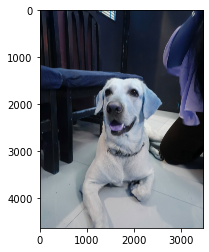

In [27]:
checkimage=cv2.imread("C:\\Users\\Jaya\\Downloads\\20201119_223655.jpg")
plt.imshow(checkimage)

In [31]:
print(predict_image_class("C:\\Users\\Jaya\\Downloads\\20201119_223655.jpg"))

dog
